<a href="https://colab.research.google.com/github/alemskdlt/dl02/blob/main/notebook/ch08_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch08: DNN; 심층신경망

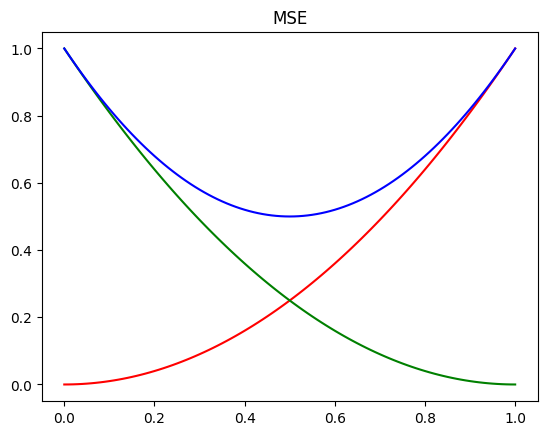

<ipython-input-1-73b451c0015e>:21: RuntimeWarning: divide by zero encountered in log
  y0 = -np.log(1-x)
<ipython-input-1-73b451c0015e>:22: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(x)


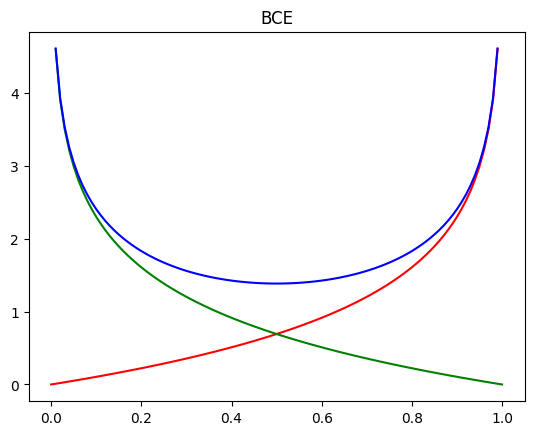

In [ ]:
# 손실함수(Loss function)
import numpy as np
import matplotlib.pyplot as plt

# MSE
# mse(y,y_hat) = (y - y_hat)**2
#
x = np.linspace(0.0, 1.0, 101) 
y0 = np.square(x)
y1 = np.square(1-x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('MSE')
plt.show() 

# BCE
# bce(y,y_hat) = - y log(y_hat) - (1-y) log(1-y_hat)
#
x = np.linspace(0.0, 1.0, 101) 
y0 = -np.log(1-x)
y1 = -np.log(x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('BCE')
plt.show() 

## 손실함수
- BCE
- CCE(sCCE)
- MSE

In [ ]:
# import numpy as np
import tensorflow as tf

# BinaryCrossentropy
y_true = [  [1],   [0],   [0],   [1]]  
y_pred = [[0.8], [0.3], [0.5], [0.9]]   
# y_pred = [[1.0], [0.3], [0.5], [1.0]]   
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true, y_pred).numpy())
      
# CategoricalCrossentropy
y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지
y_pred = [[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.7, 0.2]]
cce = tf.keras.losses.CategoricalCrossentropy ()
print(cce(y_true, y_pred).numpy ())      

y_true = [ 12 , 20 , 29 , 60 ]
y_pred = [ 14 , 18 , 27 , 55 ]
mse = tf.keras.losses.MeanSquaredError ()
print(mse(y_true, y_pred).numpy())

#########################################
def  custom_loss_function (y_true, y_pred) :
   squared_difference = tf.square (y_true-y_pred)
   return tf.reduce_mean (squared_difference, axis = -1 )

import numpy as np
custom_loss_function(np.array(y_true), np.array(y_pred)).numpy()


0.3445814
1.936381
9


9

In [ ]:
# CategoricalCrossentropy
y_true = [1, 2, 0] # 고양이, 호랑이, 강아지
y_pred = [[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.7, 0.2]]
scce = tf.keras.losses.SparseCategoricalCrossentropy ()
print(scce(y_true, y_pred).numpy ())      

1.936381


Encoding
- int encoding
- one-hot encoding

In [ ]:
import numpy as np
X = np.array([['Korea', 44, 7200],
		      ['Japan', 27, 4800],
	          ['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
print(X)


[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


In [ ]:
# OneHotEncoder
import numpy as np
X = np.array([['Korea', 44, 7200], 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = onehotencoder.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(XX)

X = np.delete(X, [0], axis=1)		# 0번째 열 삭제
X = np.concatenate((XX, X), axis = 1)	# X와 XX를 붙인다. 
print(X)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


## One-Hot encoding using Keras

In [ ]:
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical
output = to_categorical(class_vector, num_classes = 7, dtype ="int32")
print(output)


[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]


In [ ]:

#
# mnist data
#
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

print(y_train[:10])

y_train_one_hot = to_categorical(y_train, num_classes = 10) #, dtype ="int32")
y_train_one_hot.shape
y_train_one_hot[:10]
# y_train[:10]


11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
[5 0 4 1 9 2 1 3 1 4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 데이터 정규화
- minmax
- standard

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))	# 데이터를 변환한다. 

# StandardScaler()
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# data = [[-1, 2, 7], [-0.5, 6, 3], [0, 10, -2], [1, 18, 6]]

scaler = StandardScaler()
scaler.fit(data)		# 평균=0, 분산=std 로 데이터 변경
print(scaler.transform(data))	# 데이터를 변환한다. 


[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## Nomalization layer

In [ ]:
import numpy as np
from  tensorflow.keras.layers.experimental.preprocessing import Normalization

input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
print(layer(input_data))

#
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
layer.adapt(adapt_data)
print(layer(input_data))

tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


## Overfitting 처리 : IMDB 데이터 사용

In [ ]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=1000)


In [ ]:
print(len(train_data[0]),np.unique(train_data[0]).size)
# max(train_data.max())
print(train_data.shape,train_labels.shape)
train_labels[:10]

218 97
(25000,) (25000,)


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
train_data[0], max(train_data.max())

Epoch 1/20
49/49 [==============================] - 2s 17ms/step - loss: 0.5623 - accuracy: 0.7237 - val_loss: 0.4213 - val_accuracy: 0.8226
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.3620 - accuracy: 0.8491 - val_loss: 0.3422 - val_accuracy: 0.8560
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3198 - accuracy: 0.8686 - val_loss: 0.3304 - val_accuracy: 0.8606
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3079 - accuracy: 0.8731 - val_loss: 0.3290 - val_accuracy: 0.8603
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3026 - accuracy: 0.8740 - val_loss: 0.3290 - val_accuracy: 0.8593
Epoch 6/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2988 - accuracy: 0.8771 - val_loss: 0.3302 - val_accuracy: 0.8590
Epoch 7/20
49/49 [==============================] - 0s 9ms/step - loss: 0.2981 - accuracy: 0.8773 - val_loss: 0.3300 - val_accuracy: 0.8600
Epoch 8/20
49/49 [

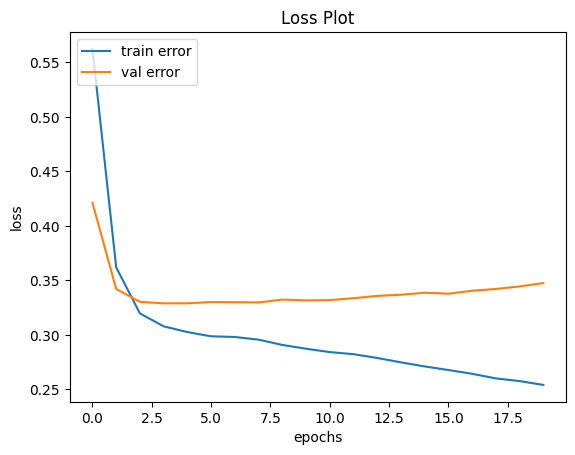

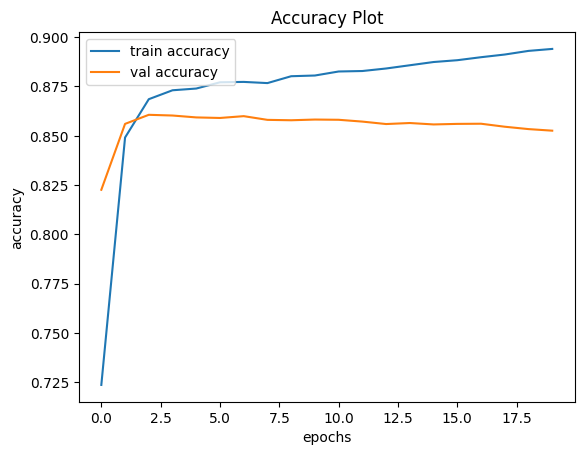

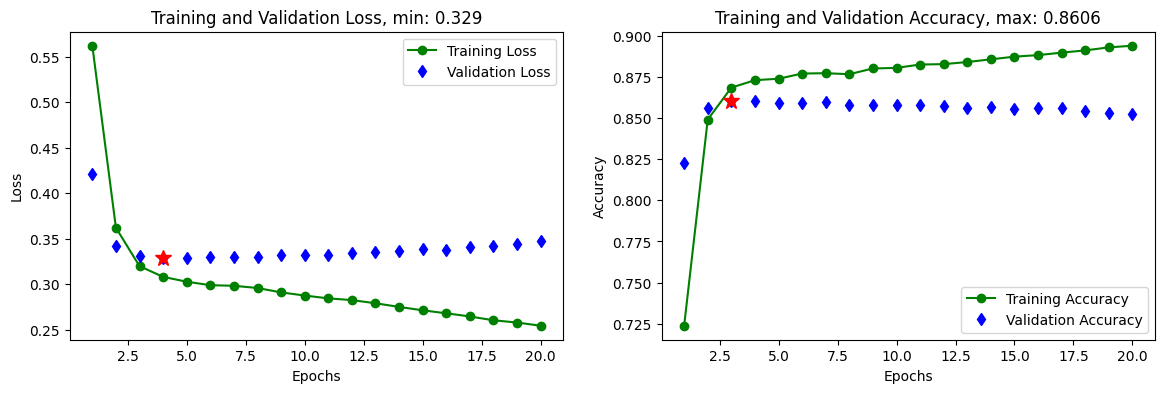

In [ ]:
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# train_data.shape,test_data.shape
# train_data[0].shape
# train_data[0]

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=1)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 가중치 규제
- L1
- L2

Epoch 1/20
49/49 - 2s - loss: 0.6283 - accuracy: 0.7046 - val_loss: 0.4810 - val_accuracy: 0.8213 - 2s/epoch - 32ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4147 - accuracy: 0.8489 - val_loss: 0.3885 - val_accuracy: 0.8552 - 396ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3660 - accuracy: 0.8675 - val_loss: 0.3706 - val_accuracy: 0.8611 - 404ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3517 - accuracy: 0.8721 - val_loss: 0.3696 - val_accuracy: 0.8601 - 380ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3452 - accuracy: 0.8738 - val_loss: 0.3646 - val_accuracy: 0.8608 - 404ms/epoch - 8ms/step
Epoch 6/20
49/49 - 1s - loss: 0.3414 - accuracy: 0.8748 - val_loss: 0.3781 - val_accuracy: 0.8533 - 558ms/epoch - 11ms/step
Epoch 7/20
49/49 - 1s - loss: 0.3391 - accuracy: 0.8739 - val_loss: 0.3622 - val_accuracy: 0.8607 - 702ms/epoch - 14ms/step
Epoch 8/20
49/49 - 1s - loss: 0.3348 - accuracy: 0.8765 - val_loss: 0.3616 - val_accuracy: 0.8600 - 714ms/epoch - 15ms/step
Epoch 9/20
49/4

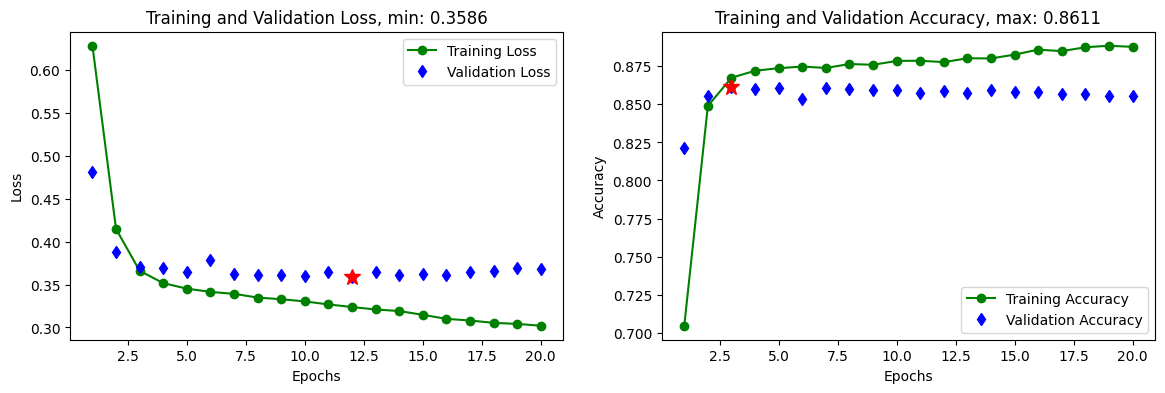

In [ ]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Dropout

Epoch 1/20
49/49 - 2s - loss: 0.6863 - accuracy: 0.5520 - val_loss: 0.6600 - val_accuracy: 0.6920 - 2s/epoch - 38ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6279 - accuracy: 0.6588 - val_loss: 0.5370 - val_accuracy: 0.8031 - 431ms/epoch - 9ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5289 - accuracy: 0.7532 - val_loss: 0.4114 - val_accuracy: 0.8399 - 435ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4563 - accuracy: 0.8005 - val_loss: 0.3596 - val_accuracy: 0.8515 - 393ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4180 - accuracy: 0.8284 - val_loss: 0.3456 - val_accuracy: 0.8569 - 447ms/epoch - 9ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3969 - accuracy: 0.8369 - val_loss: 0.3305 - val_accuracy: 0.8586 - 415ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3766 - accuracy: 0.8463 - val_loss: 0.3263 - val_accuracy: 0.8592 - 412ms/epoch - 8ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3663 - accuracy: 0.8559 - val_loss: 0.3240 - val_accuracy: 0.8598 - 398ms/epoch - 8ms/step
Epoch 9/20
49/49 -

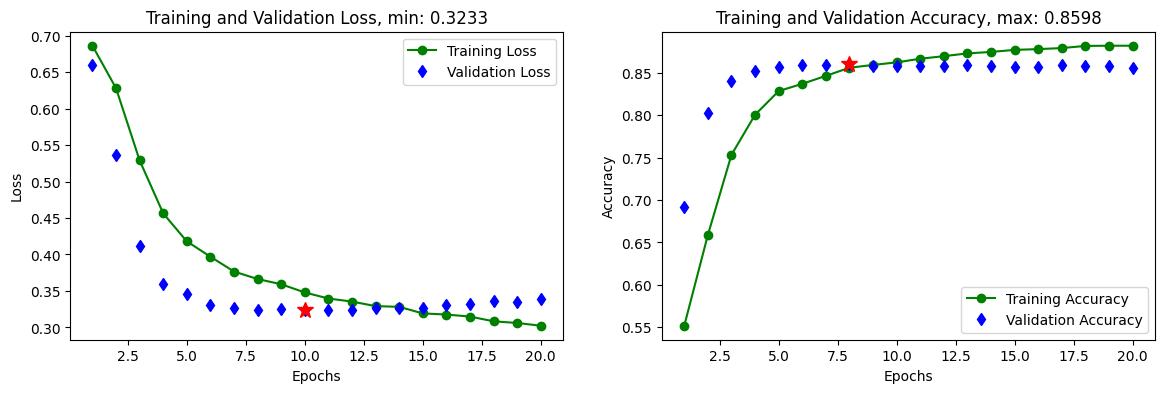

In [ ]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## DNN 응용의 예
- MNIST 
- Fashion MNIST
- Titanic survival

(60000, 28, 28) (60000,)
Epoch 1/20
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2219 - accuracy: 0.9341 - val_loss: 0.1226 - val_accuracy: 0.9633
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0988 - accuracy: 0.9698 - val_loss: 0.0789 - val_accuracy: 0.9760
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0695 - accuracy: 0.9781 - val_loss: 0.0783 - val_accuracy: 0.9743
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0664 - val_accuracy: 0.9799
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.0685 - val_accuracy: 0.9801
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0379 - accuracy: 0.9873 - val_loss: 0.0801 - val_accuracy: 0.9787
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0317 - accuracy: 0.9892 - 

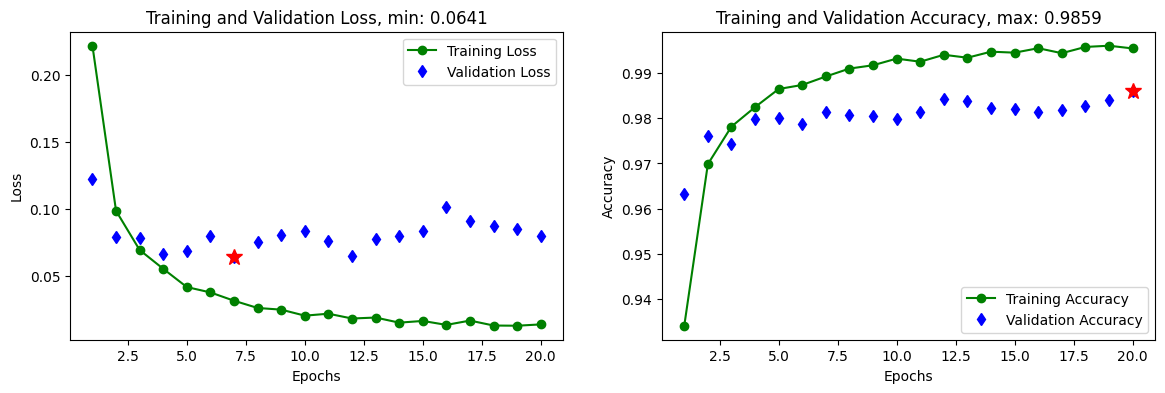

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape,y_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=1)

model.evaluate(x_test, y_test)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



### Fashion MNIST

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5020 - accuracy: 0.8245 - val_loss: 0.4191 - val_accuracy: 0.8526
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3779 - accuracy: 0.8649 - val_loss: 0.3846 - val_accuracy: 0.8598
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3368 - accuracy: 0.8784 - val_loss: 0.3617 - val_accuracy: 0.8686
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3118 - accuracy: 0.8875 - val_loss: 0.3534 - val_accuracy: 0.8757
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2966 - accuracy: 0.8921 - val_loss: 0.3533 - val_accuracy: 0.8728
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2808 - accuracy: 0.8963 - val_loss: 0.3547 - val_accuracy: 0.8732
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step 

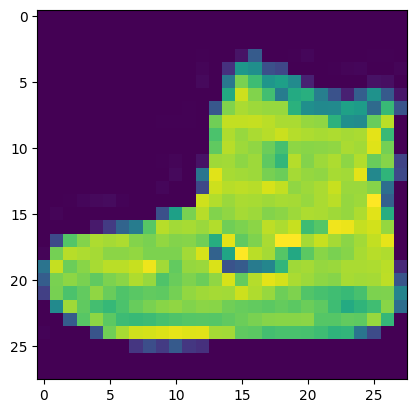

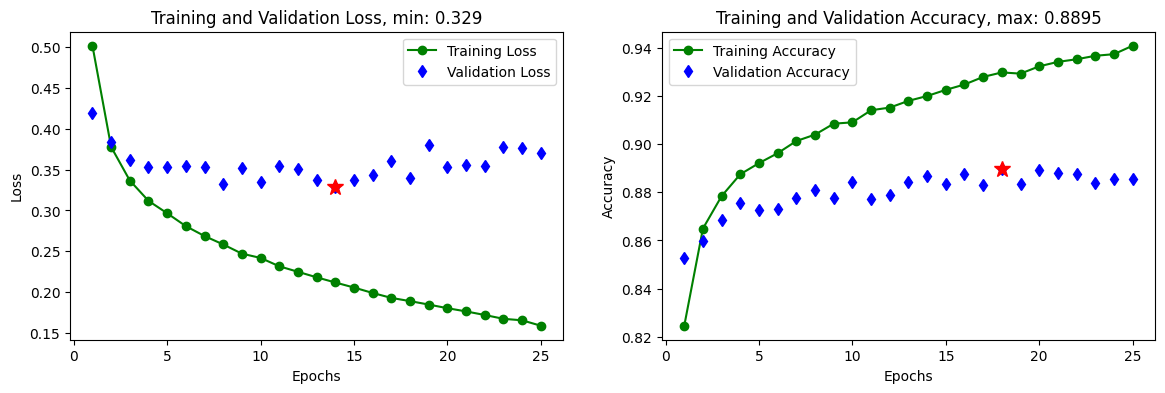

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# print(train_images.shape,train_labels.shape)
# print(train_labels[:10])

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
          epochs=25,
          validation_data=(test_images, test_labels),
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 타이타닉 생존 예측

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다. 
train = pd.read_csv("train.csv", sep=',')
test = pd.read_csv("test.csv", sep=',')
# print(train.shape)
# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
# print(train.shape)
# train.head()
train.isna().sum()
train.duplicated().sum()
# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)
train.shape
# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

train.head()
# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 
target.shape
# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 
train.shape
train.head()
# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)

Epoch 1/30
891/891 [==============================] - 4s 3ms/step - loss: 0.5759 - accuracy: 0.6779
Epoch 2/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5142 - accuracy: 0.7811
Epoch 3/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4962 - accuracy: 0.7879
Epoch 4/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4850 - accuracy: 0.7868
Epoch 5/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4821 - accuracy: 0.7868
Epoch 6/30
891/891 [==============================] - 4s 5ms/step - loss: 0.4783 - accuracy: 0.7868
Epoch 7/30
891/891 [==============================] - 2s 3ms/step - loss: 0.4743 - accuracy: 0.7879
Epoch 8/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4722 - accuracy: 0.7823
Epoch 9/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4713 - accuracy: 0.7834
Epoch 10/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4692 - accuracy: 0.7845

In [ ]:
test.shape, test.columns

((418, 2), Index(['Pclass', 'Sex'], dtype='object'))

In [45]:
######################################
# 훈련시킨 모델을 테스트 데이터에 적용 : 생사 예측
######################################
# test model
# 필요없는 컬럼을 삭제한다.
test = pd.read_csv("test.csv", sep=',')

test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

# 결손치가 있는 데이터 행은 삭제한다. 
test.isna().sum()
test.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in test.index:
    if test.loc[ix, 'Sex']=="male":
       test.loc[ix, 'Sex']=1 
    else:
       test.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
# target_test = np.ravel(test.Survived) 
# 생존여부를 학습 데이터에서 삭제한다. 
# test.drop(['Survived'], inplace=True, axis=1)
test = test.astype(float)     
test.shape   # (418,2)
# 학습된 model을 이용해서 tset 데이터에 대한 생존 예측
pred_test = model.predict(test, batch_size=1)
# Survival
print(np.where(pred_test >= 0.5)[0].size)  # 152
# Dead
print(np.where(pred_test < 0.5)[0].size)   # 266




418/418 [==============================] - 4s 10ms/step
152
266
